In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from regressors import stats
from scipy.stats import kurtosis, skew, boxcox
from sklearn.kernel_ridge import KernelRidge

In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

In [3]:
na_counts_train = train.isnull().sum()
na_counts_train[na_counts_train != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
na_counts_test = test.isnull().sum()
na_counts_test[na_counts_test != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [5]:
class DataCleaner:
    
    
    def __init__(self, train, test):
        self.train = train.copy()
        self.test = test.copy()
        
    
    def cleanAlley(self):
        self.train.loc[:,'Alley'] = self.train['Alley'].fillna('No_Alley_Access')
        self.test.loc[:,'Alley'] = self.test['Alley'].fillna('No_Alley_Access')
    
    
    def cleanBsmt(self):
        self.cleanBsmtQual()
        self.cleanBsmtCond()
        self.cleanBsmtExposure()
        self.cleanBsmtFinType1()
        self.cleanBsmtFinType2()
        self.cleanBsmtFinSF1()
        self.cleanBsmtFinSF2()
        self.cleanBsmtUnfSF()
        self.cleanTotalBsmtSF()
        self.cleanBsmtFullBath()
        self.cleanBsmtHalfBath()
    
    def cleanBsmtQual(self):
        self.train.loc[:,'BsmtQual'] = self.train['BsmtQual'].fillna('No_Basement')
        self.test.loc[:,'BsmtQual'] = self.test['BsmtQual'].fillna('No_Basement')
        
        
    def cleanBsmtCond(self):
        self.train.loc[:,'BsmtCond'] = self.train['BsmtCond'].fillna('No_Basement')
        self.test.loc[:,'BsmtCond'] = self.test['BsmtCond'].fillna('No_Basement')
        
    
    def cleanBsmtExposure(self):
        self.train.loc[:,'BsmtExposure'] = self.train['BsmtExposure'].fillna('No_Basement')
        self.test.loc[:,'BsmtExposure'] = self.test['BsmtExposure'].fillna('No_Basement')
        
        
    def cleanBsmtFinType1(self):
        self.train.loc[:,'BsmtFinType1'] = self.train['BsmtFinType1'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType1'] = self.test['BsmtFinType1'].fillna('No_Basement')

        
    def cleanBsmtFinType2(self):
        self.train.loc[:,'BsmtFinType2'] = self.train['BsmtFinType2'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType2'] = self.test['BsmtFinType2'].fillna('No_Basement')
        
        
    def cleanBsmtFinSF1(self):

        self.train.loc[:,'BsmtFinSF1'] = self.train['BsmtFinSF1'].fillna(0)
        self.test.loc[:,'BsmtFinSF1'] = self.test['BsmtFinSF1'].fillna(0)

        
    def cleanBsmtFinSF2(self):
        self.train.loc[:,'BsmtFinSF2'] = self.train['BsmtFinSF2'].fillna(0)
        self.test.loc[:,'BsmtFinSF2'] = self.test['BsmtFinSF2'].fillna(0)
        

    def cleanBsmtUnfSF(self):
        self.train.loc[:,'BsmtUnfSF'] = self.train['BsmtUnfSF'].fillna(0)
        self.test.loc[:,'BsmtUnfSF'] = self.test['BsmtUnfSF'].fillna(0)
        
        
    def cleanTotalBsmtSF(self):
        self.train.loc[:,'TotalBsmtSF'] = self.train['TotalBsmtSF'].fillna(0)   
        self.test.loc[:,'TotalBsmtSF'] = self.test['TotalBsmtSF'].fillna(0)
        
        
    def cleanBsmtFullBath(self):
        self.train.loc[:,'BsmtFullBath'] = self.train['BsmtFullBath'].fillna(0)
        self.test.loc[:,'BsmtFullBath'] = self.test['BsmtFullBath'].fillna(0)
        
    def cleanBsmtHalfBath(self):
        self.train.loc[:,'BsmtHalfBath'] = self.train['BsmtHalfBath'].fillna(0)
        self.test.loc[:,'BsmtHalfBath'] = self.test['BsmtHalfBath'].fillna(0)
    
    
    def cleanFireplaceQu(self):
        self.train.loc[:,'FireplaceQu'] = self.train['FireplaceQu'].fillna('No_Fireplace')
        self.test.loc[:,'FireplaceQu'] = self.test['FireplaceQu'].fillna('No_Fireplace')
    
    
    def cleanGarage(self):
        self.cleanGarageType()
        self.cleanGarageYrBlt()
        self.cleanGarageFinish()
        self.cleanGarageQual()
        self.cleanGarageCond()
        self.cleanGarageCars()
        self.cleanGarageArea()
        
        
    def cleanGarageType(self):
        self.train.loc[:,'GarageType'] = self.train['GarageType'].fillna('No_Garage')
        self.test.loc[:,'GarageType'] = self.test['GarageType'].fillna('No_Garage')
        
        
    def cleanGarageYrBlt(self):
        self.train.loc[:,'GarageYrBlt'] = self.train['GarageYrBlt'].fillna(0)
        self.test.loc[:,'GarageYrBlt'] = self.test['GarageYrBlt'].fillna(0)

        
    def cleanGarageFinish(self):
        self.train.loc[:,'GarageFinish'] = self.train['GarageFinish'].fillna('No_Garage')
        self.test.loc[:,'GarageFinish'] = self.test['GarageFinish'].fillna('No_Garage')
        
        
    def cleanGarageQual(self):
        self.train.loc[:,'GarageQual'] = self.train['GarageQual'].fillna('No_Garage')        
        self.test.loc[:,'GarageQual'] = self.test['GarageQual'].fillna('No_Garage')
        
          
    def cleanGarageCond(self):
        self.train.loc[:,'GarageCond'] = self.train['GarageCond'].fillna('No_Garage')        
        self.test.loc[:,'GarageCond'] = self.test['GarageCond'].fillna('No_Garage')
        
        
    def cleanGarageCars(self):
        self.train.loc[:,'GarageCars'] = self.train['GarageCars'].fillna(0)        
        self.test.loc[:,'GarageCars'] = self.test['GarageCars'].fillna(0)
        
        
        
    def cleanGarageArea(self):
        self.train.loc[:,'GarageArea'] = self.train['GarageArea'].fillna(0)        
        self.test.loc[:,'GarageArea'] = self.test['GarageArea'].fillna(0)
        
        
    def cleanPoolQC(self):
        self.train.loc[:,'PoolQC'] = self.train['PoolQC'].fillna('No_Pool')
        self.test.loc[:,'PoolQC'] = self.test['PoolQC'].fillna('No_Pool')
    
    
    def cleanFence(self):
        self.train.loc[:,'Fence'] = self.train['Fence'].fillna('No_Fence')
        self.test.loc[:,'Fence'] = self.test['Fence'].fillna('No_Fence')

    
    def cleanMiscFeature(self):
        self.train.loc[:,'MiscFeature'] = self.train['MiscFeature'].fillna('No_Misc_Feature')
        self.test.loc[:,'MiscFeature'] = self.test['MiscFeature'].fillna('No_Misc_Feature')
        
        
    def cleanMasVnrType(self):
        #self.imputeColumn('MasVnrType')
        self.train.loc[:,'MasVnrType'] = self.train['MasVnrType'].fillna('No_MasVnr')
        self.test.loc[:,'MasVnrType'] = self.test['MasVnrType'].fillna('No_MasVnr')

        
    
    def cleanMasVnrArea(self):
        #self.imputeColumn('MasVnrArea')
        self.train.loc[:,'MasVnrArea'] = self.train['MasVnrArea'].fillna(0)
        self.test.loc[:,'MasVnrArea'] = self.test['MasVnrArea'].fillna(0)
        
        
    def cleanMSSubClass(self):
        self.train.loc[:,'MSSubClass'] = self.train['MSSubClass'].astype('object')
        self.test.loc[:,'MSSubClass'] = self.test['MSSubClass'].astype('object')


    
    def cleanLotFrontage(self):
         self.imputeColumn('LotFrontage')
        
        
    def cleanElectrical(self):
        self.imputeColumn('Electrical')
        
        
    def cleanMSZoning(self):
        self.imputeColumn('MSZoning')
        
    def cleanUtilities(self):
        self.imputeColumn('Utilities')
        
        
    def cleanExterior1st(self):
        self.imputeColumn('Exterior1st')
        
    def cleanExterior2nd(self):
        self.imputeColumn('Exterior2nd')
        
    def cleanKitchenQual(self):
        self.imputeColumn('KitchenQual')
        
        
    def cleanFunctional(self):
        self.imputeColumn('Functional')
        
        
    def cleanSaleType(self):
        self.imputeColumn('SaleType')
        
        
    def imputeColumn(self, colName):
        train, test = self.dummify([colName])
        missing_train = train[train[colName].isnull()]
        train_na = train[train[colName].notnull()]
        missing_test = test[test[colName].isnull()]
        
        isMissingFeatureCol_Train = sum(missing_train.columns[missing_train.isnull().sum() != 0] != colName) == 0
        isMissingFeatureCol_Test = sum(missing_test.columns[missing_test.isnull().sum() != 0] != colName) == 0

        if (isMissingFeatureCol_Train) & (isMissingFeatureCol_Test):
            print('Dropping Rows')
            train_na = train[train[colName].notnull()]
            train_na = train_na.dropna()
            train_na_X = train_na.loc[:,train_na.columns.difference([colName,'SalePrice'])]
            train_na_y = train_na[colName]
            
            missing_train = missing_train.loc[:,missing_train.columns.difference([colName, 'SalePrice'])]
            missing_test = missing_test.loc[:,missing_test.columns.difference([colName, 'SalePrice'])]
             
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
                
            
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed  
        else:
            print('DroppingCols')
            colsWithNA = train_na.columns[train_na.isnull().sum() != 0].to_list()
            colsWithNA_Missing = missing_train.columns[missing_train.isnull().sum() != 0].to_list()
            targetCols = [colName,'SalePrice']
            colsToDrop = targetCols + colsWithNA + colsWithNA_Missing

            train_na_X = train_na.loc[:,train_na.columns.difference(colsToDrop)]
            train_na_y = train_na[colName]

            missing_train = missing_train.loc[:,missing_train.columns.difference(colsToDrop)]
            missing_test = missing_test.loc[:,missing_test.columns.difference(colsToDrop)]
            
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
        
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed
                
    def randomForestImputation(self, train_X, train_y, forestType, cv):
        
        if forestType == 'object':
            rf = RandomForestClassifier()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(confusion_matrix(predictions, y_test))
            print(accuracy_score(predictions, y_test))
            print(precision_score(predictions, y_test, average='weighted'))
            
        else:
            rf = RandomForestRegressor()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(pd.DataFrame(predictions,y_test))
            print(mean_squared_error(predictions, y_test))
        
        return rf
            
    '''
    def cleanAllColumns(self):
        self.cleanAlley()
        self.cleanBsmt()
        self.cleanElectrical()
        self.cleanFence()
        self.cleanFireplaceQu()
        self.cleanGarage()
        self.cleanMasVnrArea()
        self.cleanMasVnrType()
        self.cleanMiscFeature()
        self.cleanPoolQC()
        self.cleanMSZoning()
        self.cleanUtilities()
        self.cleanExterior1st()
        self.cleanExterior2nd()
        self.cleanKitchenQual()
        self.cleanFunctional()
        self.cleanSaleType()   
    '''

        
    def dummify(self, notCols):
        cat_cols = self.train.dtypes[self.train.dtypes == 'object'].index.to_list()
        
        try:
            for col in notCols:
                cat_cols.remove(col)
        except:
            print('Column not in category cols')
        
        dum_train = pd.DataFrame()
        dum_test = pd.DataFrame()
        dummies_train = []
        dummies_test = []
        for col in cat_cols:
            dum_train = pd.get_dummies(self.train[col], prefix=f'{col}Dummy', drop_first=True)
            dum_test = pd.get_dummies(self.test[col], prefix= f'{col}Dummy', drop_first=True)
            dummies_train.append(dum_train)
            dummies_test.append(dum_test)
            
        
        concat_dummies_train = pd.concat(dummies_train, axis=1)
        train = pd.concat([self.train, concat_dummies_train], axis=1)
        train = train.drop(cat_cols, axis=1)
       
        concat_dummies_test = pd.concat(dummies_test, axis=1)
        test = pd.concat([self.test, concat_dummies_test],axis=1)
        test = test.drop(cat_cols, axis=1)
        
        missingCols = set(train.columns) - set(test.columns)
        for col in missingCols:
            if col != 'SalePrice':
                test[col] = 0
                
        
        missingCols = set(test.columns) - set(train.columns)        
        for col in missingCols:
            train[col] = 0
            

        return [train, test]
    
    
    def ordinalEncode(self):
        ordCols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                   'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold', 'YrSold','ExterQual','ExterCond',
                   'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PoolQC','Fence','LandSlope']
        
        full = pd.concat([self.train[ordCols], self.test[ordCols]],axis=0)
        
        ordEnc = OrdinalEncoder()
        ordEnc.fit(full)
        self.train[ordCols] = ordEnc.transform(self.train[ordCols])
        self.test[ordCols] = ordEnc.transform(self.test[ordCols])        
        
    def getCategoryColumns(self):
        catColsTrain = self.train.columns[self.train.dtypes == 'object']
        catColsTest = self.test.columns[self.test.dtypes == 'object']
        
        return [catColsTrain, catColsTest]
    
    def getNumericColumns(self):
        numColsTrain = self.train.columns[self.train.dtypes != 'object']
        numColsTest = self.test.columns[self.test.dtypes != 'object']
        
        return [numColsTrain, numColsTest]
        
    
            
            
        
        

In [6]:
cleaned = DataCleaner(train, test)

In [7]:
cleaned.cleanAlley()
cleaned.cleanBsmtQual()
cleaned.cleanBsmtCond()
cleaned.cleanBsmtExposure()
cleaned.cleanBsmtFinType1()
cleaned.cleanBsmtFinType2()
cleaned.cleanBsmtFinSF1()
cleaned.cleanBsmtFinSF2()
cleaned.cleanBsmtUnfSF()
cleaned.cleanMasVnrType()
cleaned.cleanMasVnrArea()
cleaned.cleanTotalBsmtSF()
cleaned.cleanBsmtHalfBath()
cleaned.cleanBsmtFullBath()
cleaned.cleanFireplaceQu()
cleaned.cleanGarageType()
cleaned.cleanGarageYrBlt()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageCond()
cleaned.cleanGarageCars()
cleaned.cleanGarageArea()
cleaned.cleanPoolQC()
cleaned.cleanFence()
cleaned.cleanMiscFeature()
cleaned.cleanMSSubClass()

In [8]:
cleaned.cleanElectrical()
cleaned.cleanMSZoning()
cleaned.cleanUtilities()
cleaned.cleanExterior1st()
cleaned.cleanExterior2nd()
cleaned.cleanKitchenQual()
cleaned.cleanFunctional()
cleaned.cleanSaleType()
cleaned.cleanLotFrontage()

Dropping Rows
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 18   5   1 216]]
0.9
1.0
DroppingCols
[[  0   0   0   0   0]
 [  0  11   0   1   0]
 [  0   0   0   0   0]
 [  3   1   0 220   8]
 [  3   0   1   6  38]]
0.9212328767123288
0.9434862633254008
DroppingCols
[[292]]
1.0
1.0
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  1  1]
 [ 0  0  0 17  0  0  0  0  0  0  0]
 [ 0  1  1  1 32  1  0  0  0  0  2]
 [ 3  0  0  1  0 32  0  0  0  1  0]
 [ 0  0  0  0  1  0 10  0  0  1  0]
 [ 0  0  0  0  0  1  0  2  0  1  0]
 [ 0  0  0  0  0  0  0  0 85  0  1]
 [ 1  0  1  0  0  1  1  2  0 30  4]
 [ 0  0  0  0  0  0  0  0  0  1  0]]
0.8796680497925311
0.9256530613595474
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 

# EDA

In [9]:
trainCatCols, testCatCols = cleaned.getCategoryColumns()

In [10]:
trainNumCols, testNumCols = cleaned.getNumericColumns()

In [11]:
def getHistograms(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
            
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.histplot(x=col, data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    

In [12]:
def getBoxplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        #print(rowIdx,colIdx)
        if col == 'GarageYrBlt':
            continue
        ax = sns.boxplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    

In [13]:
def getScatterplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.scatterplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        colIdx += 1
    f.tight_layout()

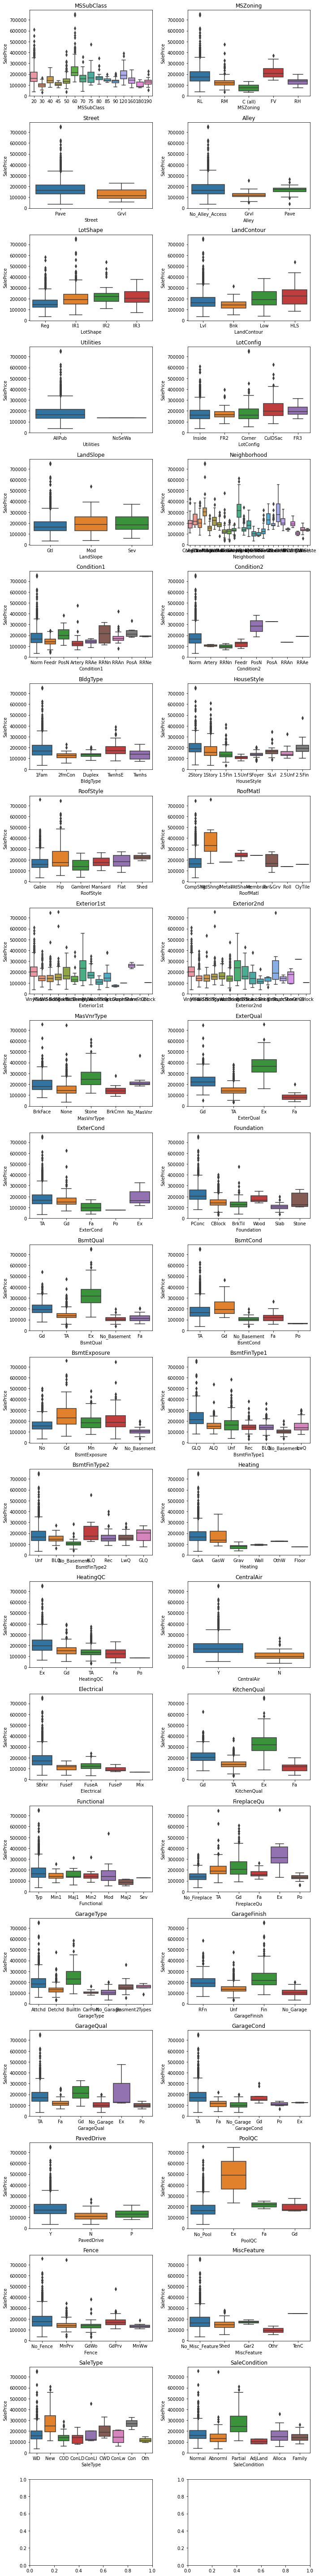

In [14]:
getBoxplots(trainCatCols, cleaned.train)

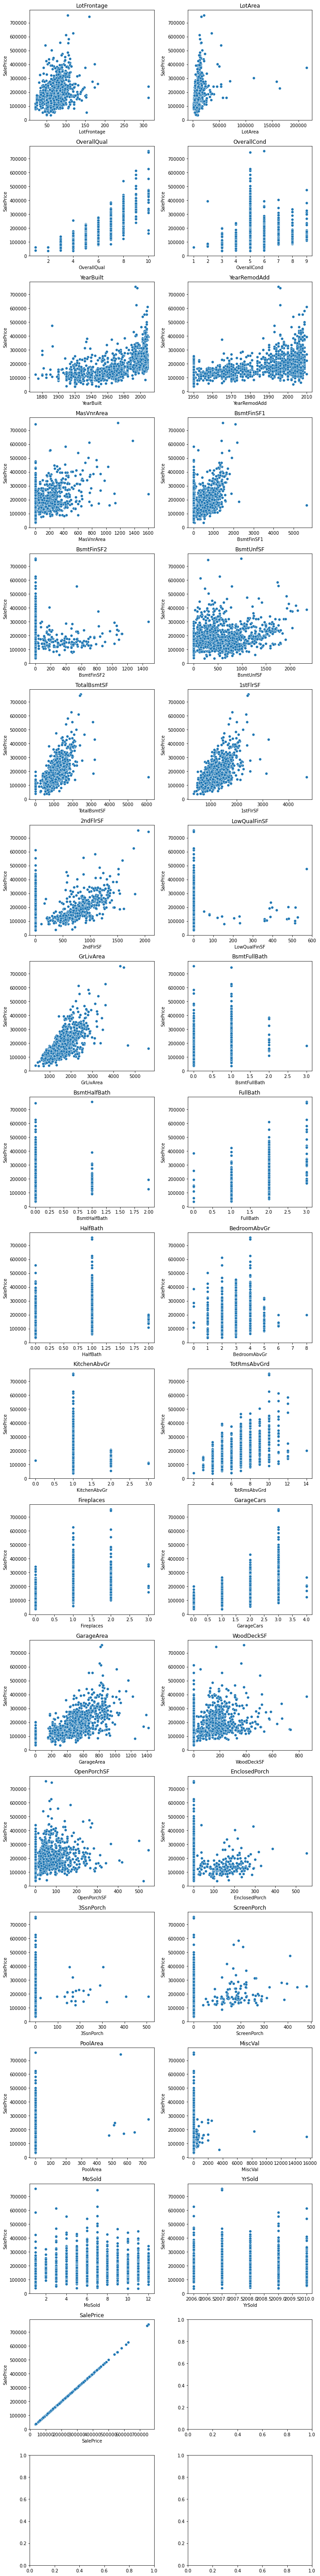

In [15]:
getScatterplots(trainNumCols, cleaned.train)

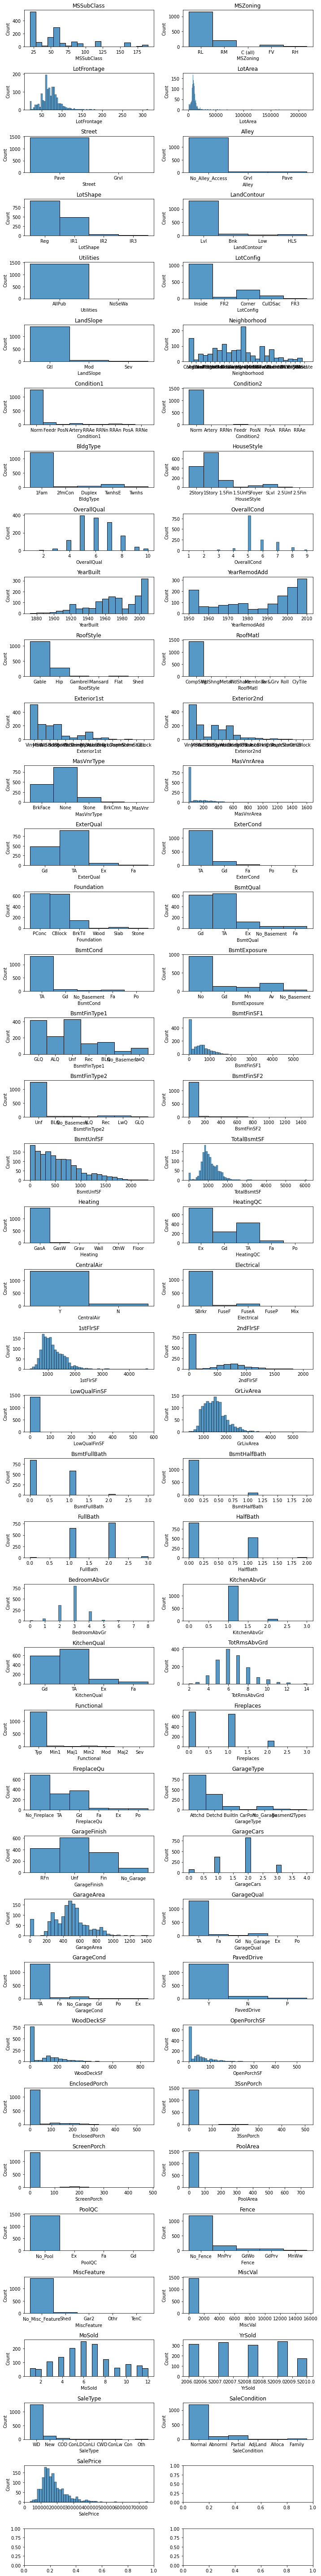

In [16]:
getHistograms(cleaned.train.columns, cleaned.train)

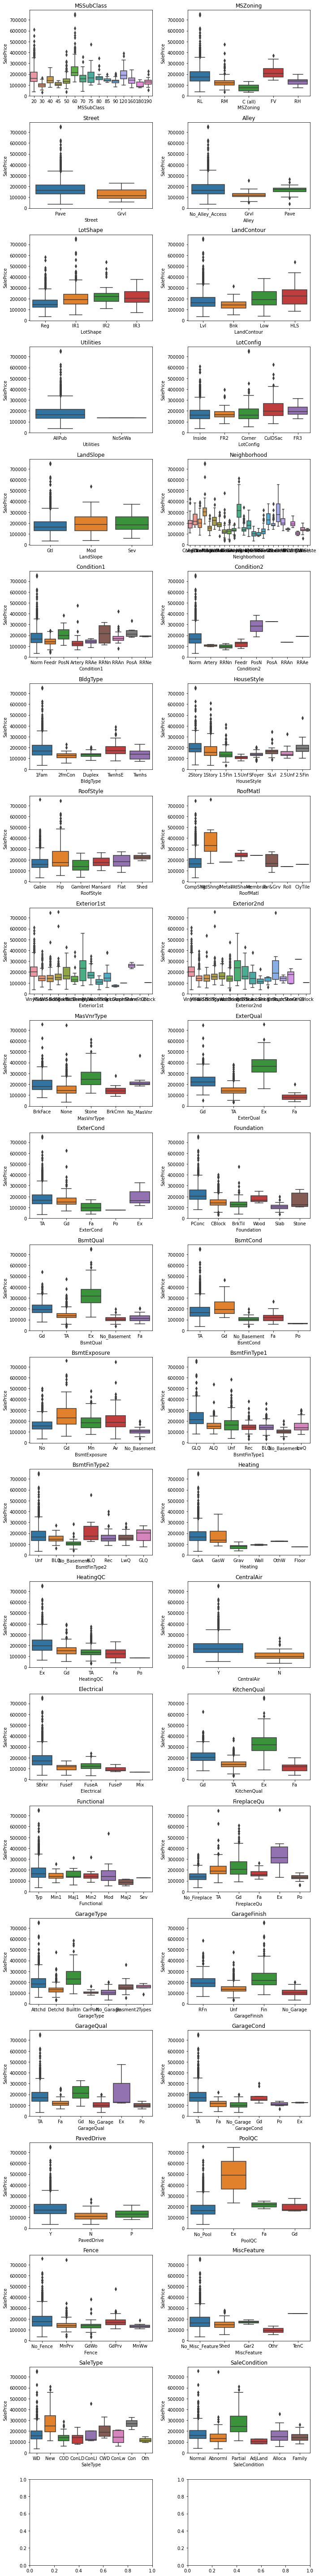

In [17]:
getBoxplots(testCatCols, cleaned.test)

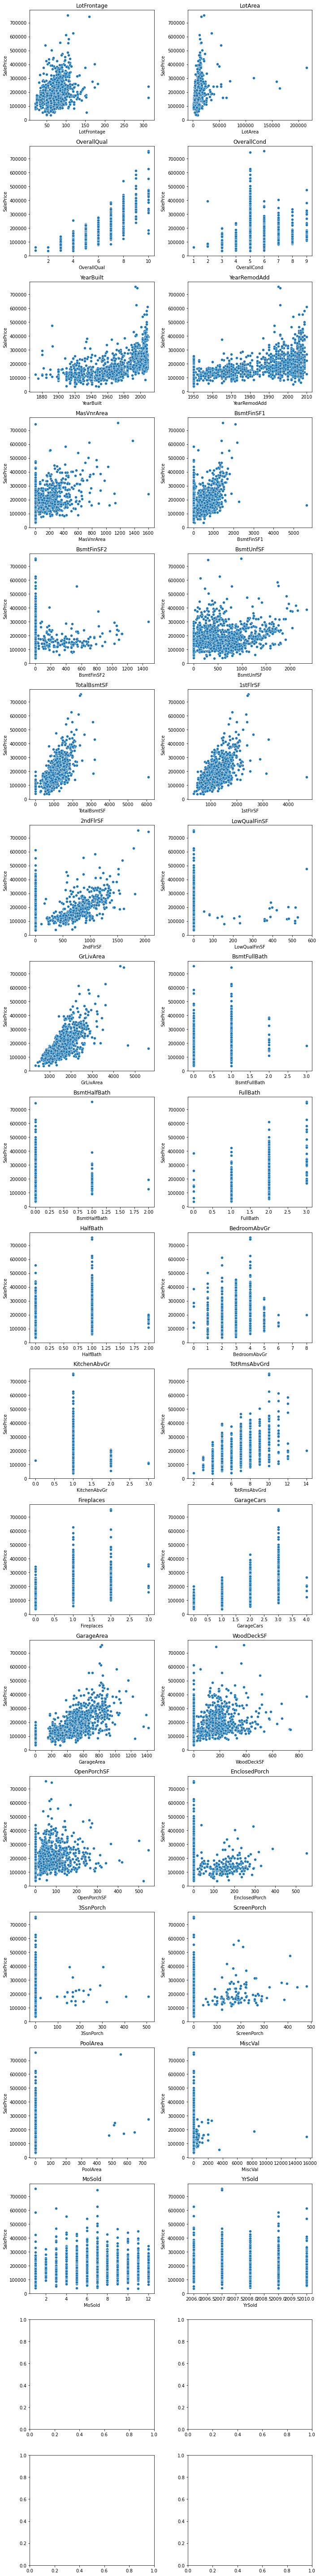

In [18]:
getScatterplots(testNumCols, cleaned.test)

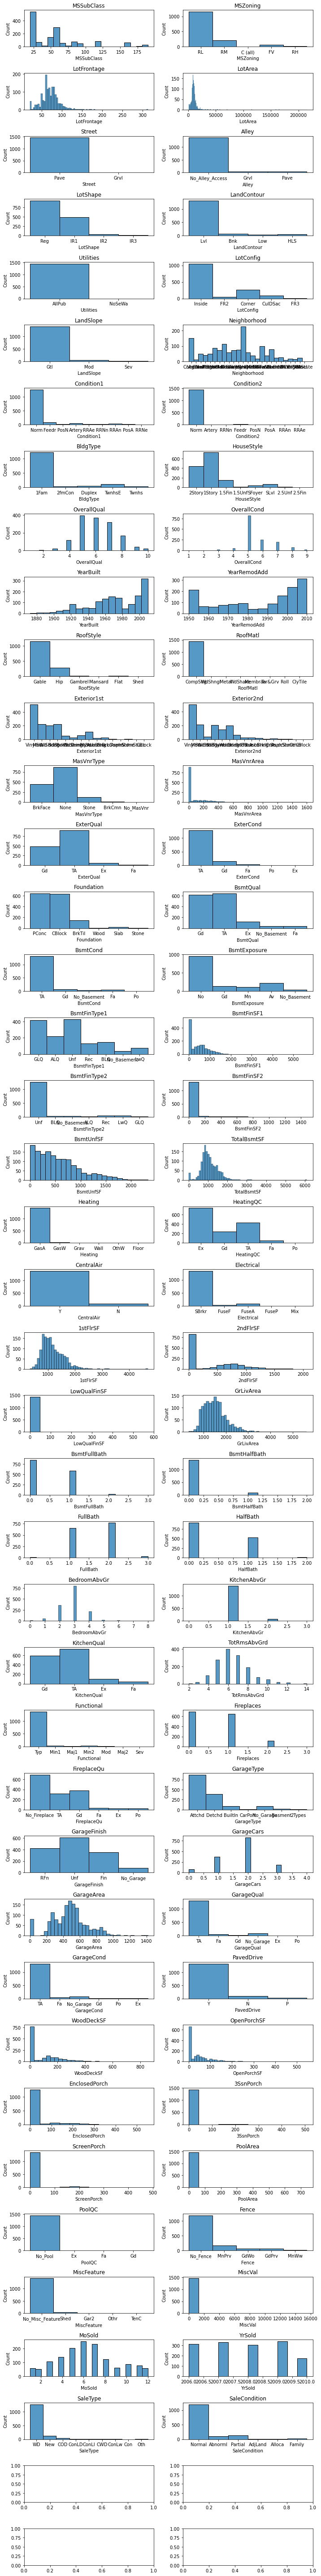

In [19]:
getHistograms(cleaned.test.columns, cleaned.test)

# Feature Engineering

In [20]:
def addHasGarage(data):
    data['hasGarage'] = data['GarageType'].apply(lambda x: 0 if x=='No_Garage' else 1)

    
def addHasBsmt(data): 
    data['hasBsmt'] = data['BsmtQual'].apply(lambda x: 0 if x=='No_Basement' else 1)
    
def addHasAlley_Access(data): 
    data['hasAlley_Access'] = data['Alley'].apply(lambda x: 0 if x=='No_Alley_Access' else 1)
    
def addHasFireplace(data):
    data['hasFireplace'] = data['FireplaceQu'].apply(lambda x: 0 if x=='No_Fireplace' else 1)
    
def addHasPool(data):
    data['hasPool'] = data['PoolQC'].apply(lambda x: 0 if x=='No_Pool' else 1)

    
def addHasFence(data): 
    data['hasFence'] = data['Fence'].apply(lambda x: 0 if x=='No_Fence' else 1)

    
def addHasMisc_Feature(data):
    data['hasMisc_Feature'] = data['MiscFeature'].apply(lambda x: 0 if x=='No_Misc_Feature' else 1)
    
    
def addHasMasVnr(data):
    data['hasMasVnr'] = data['MasVnrType'].apply(lambda x: 0 if x=='No_MasVnr' else 1)

    
def getNumFloors(row):
    count = 0
    if row['TotalBsmtSF'] != 0:
        count = count + 1
    if row['1stFlrSF'] != 0:
        count = count + 1
    if row['2ndFlrSF'] != 0:
        count = count + 1
    return count


def addGrLivAreaHighQualitySF(data):
    data['GrLivAreaHighQualitySF'] = (data['1stFlrSF'] + data['2ndFlrSF']) - data['LowQualFinSF']
    
def addTotalIndoorSF(data):
    data['TotalIndoorSF'] = data['TotalBsmtSF'] + data['GrLivAreaHighQualitySF'] + data['GarageArea']

def addTotalOutdoorSF(data):
    data['TotalOutdoorSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] 
    + data['WoodDeckSF'] + data['PoolArea']
    

def addBsmtBaths(data):
    data['BsmtBaths'] = data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

def addBaths(data):
    data['Baths'] = data['FullBath'] + (0.5 * data['HalfBath'])
    
def addHasBeenRemodeled(data):
    data['hasBeenRemodeled'] = data.apply(lambda x: 0 if x['YearBuilt'] == x['YearRemodAdd'] else 1, axis=1)

    
def plotIndicators(data):
    f, axes = plt.subplots(9,1, figsize=(10,30))
    cols = ['Garage', 'Bsmt', 'Alley_Access','Fireplace', 'Pool', 'Fence', 'Misc_Feature', 'MasVnr', 'BeenRemodeled']

    
    for idx, col in enumerate(cols):
        grouped_garage = data.groupby(f'has{col}').mean().reset_index()
        ax = sns.barplot(grouped_garage[f'has{col}'],grouped_garage['SalePrice'], ax = axes[idx])

    
    


/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

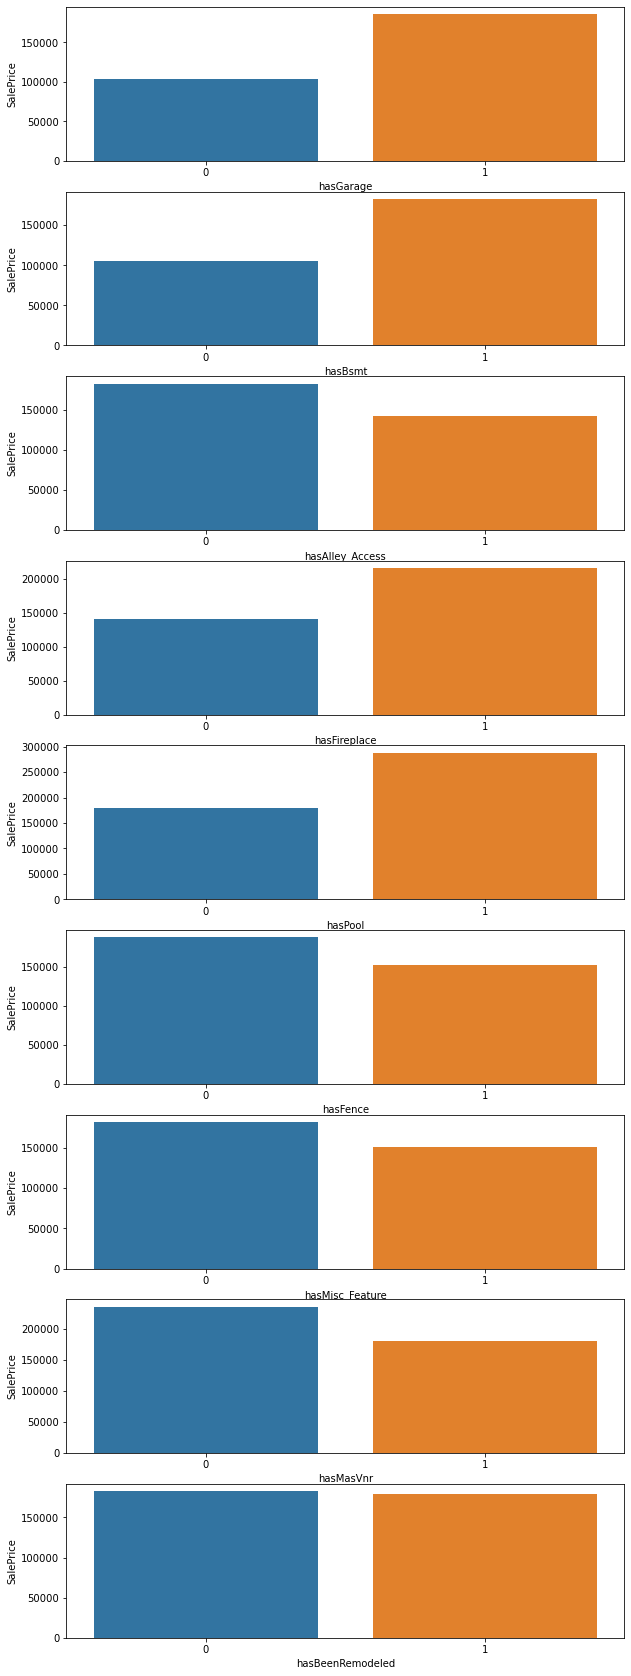

In [21]:

addHasGarage(cleaned.train)
addHasGarage(cleaned.test)

addHasBsmt(cleaned.train)
addHasBsmt(cleaned.test)

addHasAlley_Access(cleaned.train)
addHasAlley_Access(cleaned.test)

addHasFireplace(cleaned.train)
addHasFireplace(cleaned.test)

addHasPool(cleaned.train)
addHasPool(cleaned.test)

addHasFence(cleaned.train)
addHasFence(cleaned.test)

addHasMisc_Feature(cleaned.train)
addHasMisc_Feature(cleaned.test)


addHasMasVnr(cleaned.train)
addHasMasVnr(cleaned.test)


addGrLivAreaHighQualitySF(cleaned.train)
addGrLivAreaHighQualitySF(cleaned.test)


addTotalIndoorSF(cleaned.train)
addTotalIndoorSF(cleaned.test)


addTotalOutdoorSF(cleaned.train)
addTotalOutdoorSF(cleaned.test)


addBsmtBaths(cleaned.train)
addBsmtBaths(cleaned.test)


addBaths(cleaned.train)
addBaths(cleaned.test)


addHasBeenRemodeled(cleaned.train)
addHasBeenRemodeled(cleaned.test)

cleaned.train['NumFloors'] = cleaned.train.apply(getNumFloors, axis=1)
cleaned.test['NumFloors'] = cleaned.test.apply(getNumFloors, axis=1)

plotIndicators(cleaned.train)


In [22]:
'''
cleaned.train = cleaned.train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','1stFlrSF','2ndFlrSF',
                                    'LowQualFinSF','GrLivArea','OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch',
                                   'WoodDeckSF', 'PoolArea','GrLivAreaHighQualitySF','GarageArea'], axis=1)
'''


"\ncleaned.train = cleaned.train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','1stFlrSF','2ndFlrSF',\n                                    'LowQualFinSF','GrLivArea','OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch',\n                                   'WoodDeckSF', 'PoolArea','GrLivAreaHighQualitySF','GarageArea'], axis=1)\n"

In [23]:
for col in trainNumCols:
    print(col, '-' ,kurtosis(cleaned.train[col], bias = False, fisher=True))

        

def logTransform(data):
    data['LotFrontage'] = np.log1p(data['LotFrontage'])
    data['LotArea'] = np.log1p(data['LotArea'])
    data['MasVnrArea'] = np.log1p(data['MasVnrArea'])
    data['BsmtFinSF1'] = np.log1p(data['BsmtFinSF1'])
    data['BsmtFinSF2'] = np.log1p(data['BsmtFinSF2'])
    data['TotalBsmtSF'] = np.log1p(data['TotalBsmtSF'])**5
    data['1stFlrSF'] = np.log1p(data['1stFlrSF'])
    data['LowQualFinSF'] = np.log1p(data['LowQualFinSF'])
    data['BsmtHalfBath'] = np.log1p(data['BsmtHalfBath'])
    data['KitchenAbvGr'] = np.log1p(data['KitchenAbvGr'])
    data['OpenPorchSF'] = np.log1p(data['OpenPorchSF'])
    data['EnclosedPorch'] = np.log1p(data['EnclosedPorch'])
    data['3SsnPorch'] = np.log1p(data['3SsnPorch'])
    data['ScreenPorch'] = np.log1p(data['ScreenPorch'])
    data['PoolArea'] = np.log1p(data['PoolArea'])
    data['MiscVal'] = np.log1p(data['MiscVal'])
    
    try:
        data['SalePrice'] = np.log1p(data['SalePrice'])
    except:
        pass


logTransform(cleaned.train)
logTransform(cleaned.test)



LotFrontage - 15.995287862613665
LotArea - 203.2432710188603
OverallQual - 0.09629277835615113
OverallCond - 1.106413461373168
YearBuilt - -0.43955194159361977
YearRemodAdd - -1.272245192473296
MasVnrArea - 10.14141617729879
BsmtFinSF1 - 11.118236291964713
BsmtFinSF2 - 20.11333754558646
BsmtUnfSF - 0.47499398780908475
TotalBsmtSF - 13.250483281984796
1stFlrSF - 5.745841482440792
2ndFlrSF - -0.5534635576075795
LowQualFinSF - 83.23481667441742
GrLivArea - 4.895120580693175
BsmtFullBath - -0.8390982654634271
BsmtHalfBath - 16.396641945350446
FullBath - -0.8570428212743266
HalfBath - -1.076927284147622
BedroomAbvGr - 2.2308745821912375
KitchenAbvGr - 21.53240384013878
TotRmsAbvGrd - 0.8807615657189474
Fireplaces - -0.21723720752814657
GarageYrBlt - 13.0432256773827
GarageCars - 0.22099776396532889
GarageArea - 0.9170672022708684
WoodDeckSF - 2.9929509247039086
OpenPorchSF - 8.490335805910508
EnclosedPorch - 10.43076594403043
3SsnPorch - 123.66237944970541
ScreenPorch - 18.43906784486968
Po

# Dummify Columns

In [24]:
cleaned.ordinalEncode()

In [25]:
trained, tested = cleaned.dummify(['ExternalQual','ExternalCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'
                                  'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual'
                                  'GarageCond','PoolQC','FenceQC','LandSlope'])

Column not in category cols


# Feature Selection

In [26]:
allZeroCols = trained.columns[(trained == 0).all()].to_list() + tested.columns[(tested == 0).all()].to_list()
trained = trained.drop(allZeroCols, axis=1)
tested = tested.drop(allZeroCols, axis=1)

In [27]:
X = trained.loc[:, trained.columns != 'SalePrice']
y = trained['SalePrice']

In [28]:
def get_k_best(k):
    k_best = SelectKBest(f_regression, k=k).fit(X, y)
    X[X.columns[k_best.get_support()]]

    k_best_scores = zip(X.columns, k_best.scores_)
    sorted_coef_importance = sorted(list(k_best_scores),key= lambda x: x[1],reverse=True)
    sorted_coef_importance

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_coef_importance[:k]], [x[1] for x in sorted_coef_importance[:k]])
    plt.xticks(rotation=90)

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


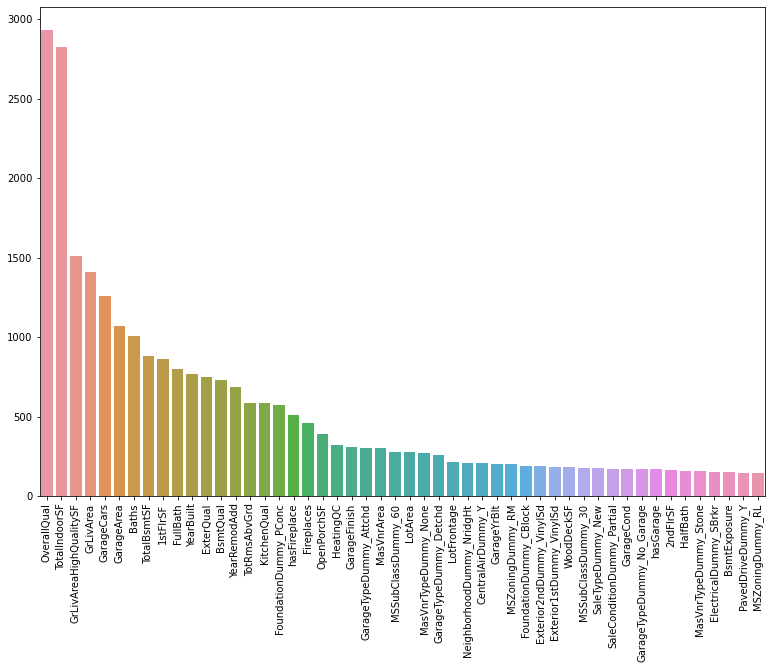

In [29]:
get_k_best(50)

# Correlation Matrix

In [30]:
non_dummy_cols = [col for col in X.columns if 'Dummy' not in col]

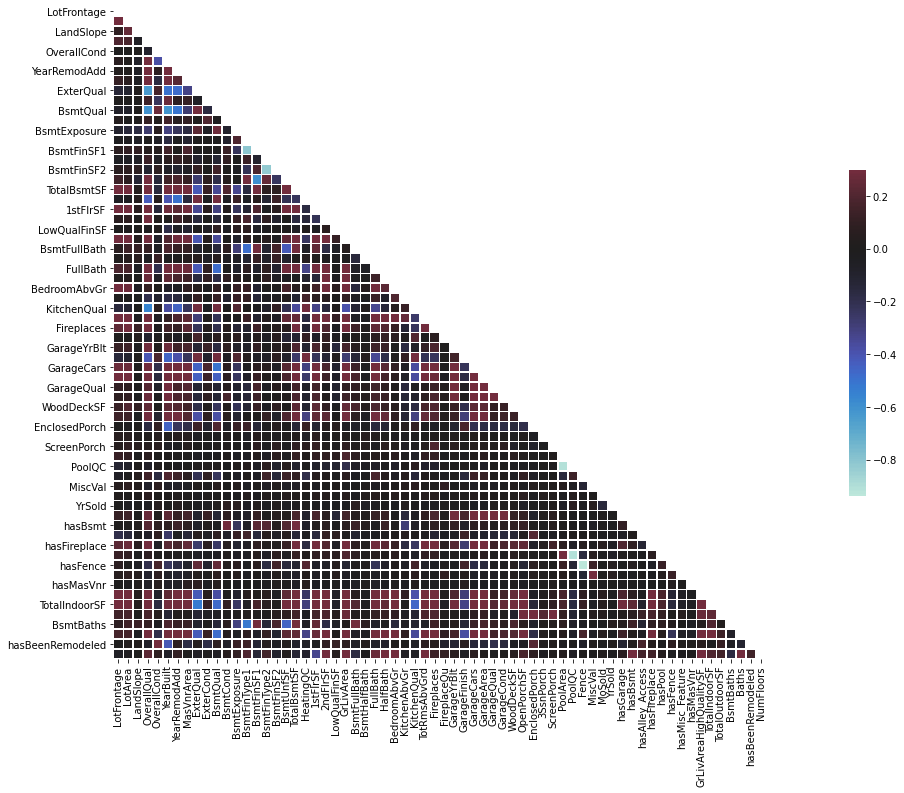

In [31]:
f, ax = plt.subplots(figsize=(30, 12))
corr = X[non_dummy_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-32-f910dd4be41c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,hasFence,hasMisc_Feature,hasMasVnr,GrLivAreaHighQualitySF,TotalIndoorSF,TotalOutdoorSF,BsmtBaths,Baths,hasBeenRemodeled,NumFloors
LotFrontage,NaN,0.734274,0.091066,0.192178,-0.004872,0.061717,0.029887,0.115944,-0.130399,0.010139,...,0.064234,0.045914,-0.004999,0.364724,0.426435,0.149850,0.074987,0.168399,-0.007641,-0.053538
LotArea,NaN,NaN,0.255902,0.178220,-0.006308,0.021943,0.027672,0.069262,-0.107623,-0.003441,...,-0.000872,0.079817,-0.019996,0.395313,0.447094,0.166234,0.149818,0.170527,0.033929,-0.024954
LandSlope,NaN,NaN,NaN,-0.066450,0.010355,-0.073639,-0.059105,-0.046761,0.021040,0.000834,...,-0.040986,0.047764,0.016754,0.041616,0.038518,0.004818,0.133348,-0.040347,0.032872,-0.004811
OverallQual,NaN,NaN,NaN,NaN,-0.091932,0.572323,0.550684,0.409317,-0.634319,0.138581,...,-0.189639,-0.095455,-0.061780,0.603364,0.698451,0.171172,0.102640,0.585038,-0.080468,0.227268
OverallCond,NaN,NaN,NaN,NaN,NaN,-0.375983,0.073741,-0.154307,0.169186,-0.227407,...,0.170748,0.074813,0.046731,-0.085070,-0.158097,0.056514,-0.028049,-0.192197,0.308884,0.083153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TotalOutdoorSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.027218,0.131201,0.108268,0.156083
BsmtBaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080700,-0.052106,-0.168321
Baths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.104672,0.462798
hasBeenRemodeled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147735


In [33]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
mostCorrelatedFeat = get_top_abs_correlations(corr, 500)
mostCorrelatedFeat

Top Absolute Correlations


PoolArea         hasPool                   0.999990
MiscVal          hasMisc_Feature           0.998690
GarageYrBlt      hasGarage                 0.998382
GrLivArea        GrLivAreaHighQualitySF    0.996899
PoolQC           hasPool                   0.995027
                                             ...   
KitchenQual      EnclosedPorch             0.478033
OpenPorchSF      TotalOutdoorSF            0.477679
LotArea          GarageFinish              0.477408
hasAlley_Access  hasBeenRemodeled          0.477376
TotalBsmtSF      GarageYrBlt               0.477080
Length: 500, dtype: float64

In [34]:
dropped = set()
for pair in mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9]:
    corr1 = X[pair[0]].corr(y)
    corr2 = X[pair[1]].corr(y)
            
    if abs(corr1) > abs(corr2):
        dropped.add(pair[1])
    else:
        dropped.add(pair[0])


In [35]:
mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9]

MultiIndex([(              'PoolArea',                'hasPool'),
            (               'MiscVal',        'hasMisc_Feature'),
            (           'GarageYrBlt',              'hasGarage'),
            (             'GrLivArea', 'GrLivAreaHighQualitySF'),
            (                'PoolQC',                'hasPool'),
            (              'PoolArea',                 'PoolQC'),
            (                 'Fence',               'hasFence'),
            (            'GarageCars',             'GarageArea'),
            (          'BsmtFullBath',              'BsmtBaths'),
            (            'Fireplaces',           'hasFireplace'),
            (              'FullBath',                  'Baths'),
            (          'BsmtFinType1',             'BsmtFinSF1'),
            (             'GrLivArea',           'TotRmsAbvGrd'),
            (             'ExterQual',            'KitchenQual'),
            (           'OverallQual',              'ExterQual'),
          

In [36]:
allVars = set()
for i in range(len(mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9])):
    for j in range(2):
        allVars.add(mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9][i][j])

In [37]:
allVars

{'1stFlrSF',
 '2ndFlrSF',
 'Baths',
 'BsmtBaths',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtQual',
 'ExterQual',
 'Fence',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'GrLivArea',
 'GrLivAreaHighQualitySF',
 'HeatingQC',
 'KitchenQual',
 'LotArea',
 'LotFrontage',
 'MiscVal',
 'NumFloors',
 'OverallQual',
 'PoolArea',
 'PoolQC',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'TotalIndoorSF',
 'YearBuilt',
 'YearRemodAdd',
 'hasFence',
 'hasFireplace',
 'hasGarage',
 'hasMisc_Feature',
 'hasPool'}

In [38]:
remaining = allVars - dropped

In [39]:
remaining

{'2ndFlrSF',
 'BsmtBaths',
 'BsmtFinType2',
 'GarageCond',
 'GarageYrBlt',
 'LotArea',
 'OverallQual',
 'PoolQC',
 'TotalBsmtSF',
 'YearBuilt',
 'hasFence',
 'hasFireplace',
 'hasMisc_Feature'}

In [40]:
#X = X.loc[:, X.columns.difference(dropped)]
#X = X.drop(['GarageCars','PoolQC','1stFlrSF','ExterQual','YearRemodAdd'], axis=1)

# Model Training

In [41]:
'''
split_indices = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    split_indices.append([train_index, test_index])
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
'''

'\nsplit_indices = []\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\nfor train_index, test_index in kf.split(X, y):\n    split_indices.append([train_index, test_index])\n    print("TRAIN:", len(train_index), "TEST:", len(test_index))\n    X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n    y_train, y_test = y.iloc[train_index], y.iloc[test_index]\n'

In [42]:
#model = GradientBoostingRegressor()
model = GradientBoostingRegressor()
params = {'n_estimators': [100,200,300,500],
          'max_depth':[3,4,5],
          'max_features':['sqrt'],
          'subsample':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3], 
          'loss':['ls']}

gridGbr = GridSearchCV(model, param_grid=params, cv=5)
gridGbr.fit(X, y)
gridGbr.cv_results_

{'mean_fit_time': array([0.08038363, 0.08154216, 0.08137012, 0.06528411, 0.06832685,
        0.05948815, 0.05105634, 0.04718142, 0.11662264, 0.12667899,
        0.12160907, 0.11707997, 0.11198459, 0.10466514, 0.12549119,
        0.11555824, 0.20629153, 0.23374181, 0.24021273, 0.20864224,
        0.19482617, 0.22441745, 0.186589  , 0.14881244, 0.31168952,
        0.30783496, 0.29694605, 0.28588715, 0.27714667, 0.25993271,
        0.24045267, 0.2519094 , 0.07539515, 0.08009853, 0.07996297,
        0.07219357, 0.06887236, 0.064676  , 0.05576921, 0.05075207,
        0.14597459, 0.16918907, 0.15898948, 0.15806131, 0.14293919,
        0.12096415, 0.10807972, 0.09887371, 0.21666288, 0.26775565,
        0.25381122, 0.23066053, 0.22440014, 0.19021192, 0.16314406,
        0.15365891, 0.34074221, 0.4064528 , 0.35338836, 0.33330946,
        0.31502705, 0.29735579, 0.27229657, 0.24636836, 0.08565335,
        0.09004478, 0.08481784, 0.08057442, 0.07421679, 0.0695653 ,
        0.06312637, 0.05668201,

In [43]:
gridGbr.best_params_

{'loss': 'ls',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'subsample': 1}

In [44]:
gridGbr.best_score_

0.9039124393905607

In [45]:
gridGbr.best_estimator_.feature_importances_

array([4.14805596e-03, 1.18381590e-02, 6.89306289e-05, 2.10872818e-01,
       1.66938252e-02, 2.70513605e-02, 1.80727006e-02, 1.56273529e-03,
       8.46114952e-03, 5.86244118e-04, 1.98808477e-02, 7.69010654e-05,
       3.60010150e-03, 3.35365496e-03, 1.71022749e-02, 2.71775871e-04,
       3.56464000e-04, 8.74292789e-04, 3.91522025e-02, 1.71092065e-03,
       5.96077522e-02, 1.26334077e-02, 3.77585325e-04, 8.15077532e-02,
       4.98066557e-03, 3.59874577e-05, 8.91329555e-03, 1.32967983e-03,
       5.89106642e-04, 1.04787221e-03, 1.94855904e-02, 4.50791827e-04,
       1.01140575e-03, 1.86055726e-02, 5.93501615e-03, 3.57049159e-03,
       1.85390313e-02, 3.15046123e-02, 1.97327266e-02, 3.75337669e-03,
       6.61033646e-03, 4.31974956e-03, 4.69865078e-04, 1.29059850e-05,
       1.01788891e-03, 1.01792386e-03, 0.00000000e+00, 1.47389267e-04,
       5.55660052e-05, 1.37170717e-03, 2.89300807e-04, 1.31653871e-03,
       1.24604017e-05, 2.49861947e-05, 1.86002088e-02, 4.32868169e-05,
      

In [46]:
def getFeatureImportance(num, cols, features_importances_, sort):
    
    feature_importances = zip(cols, features_importances_)
    sorted_importance = sorted(list(feature_importances),key= lambda x: abs(x[1]),reverse=False if sort == 'ascending' else True)

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_importance[:num]], [x[1] for x in sorted_importance[:num]])
    plt.xticks(rotation=90)
    
    return sorted_importance

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('OverallQual', 0.21087281816034742),
 ('GrLivArea', 0.08150775319534763),
 ('TotalIndoorSF', 0.07203717530376533),
 ('1stFlrSF', 0.05960775224804366),
 ('Baths', 0.05286030587796846),
 ('TotalBsmtSF', 0.039152202476709946),
 ('GrLivAreaHighQualitySF', 0.031985686735697426),
 ('MSSubClassDummy_60', 0.031541198255800616),
 ('GarageArea', 0.03150461229320225),
 ('YearBuilt', 0.02705136046716065),
 ('BsmtQual', 0.019880847652648796),
 ('GarageQual', 0.019732726585581242),
 ('KitchenQual', 0.01948559035678568),
 ('FireplaceQu', 0.018605572581252183),
 ('hasFireplace', 0.018600208778804493),
 ('GarageCars', 0.018539031345046936),
 ('YearRemodAdd', 0.018072700588842996),
 ('MasVnrTypeDummy_None', 0.017747704007485182),
 ('NeighborhoodDummy_NridgHt', 0.017725250357990933),
 ('BsmtFinSF1', 0.01710227486152699),
 ('OverallCond', 0.016693825158167776),
 ('2ndFlrSF', 0.012633407687150449),
 ('LotArea', 0.011838158961428046),
 ('FullBath', 0.008913295551104799),
 ('ExterQual', 0.00846114952097322

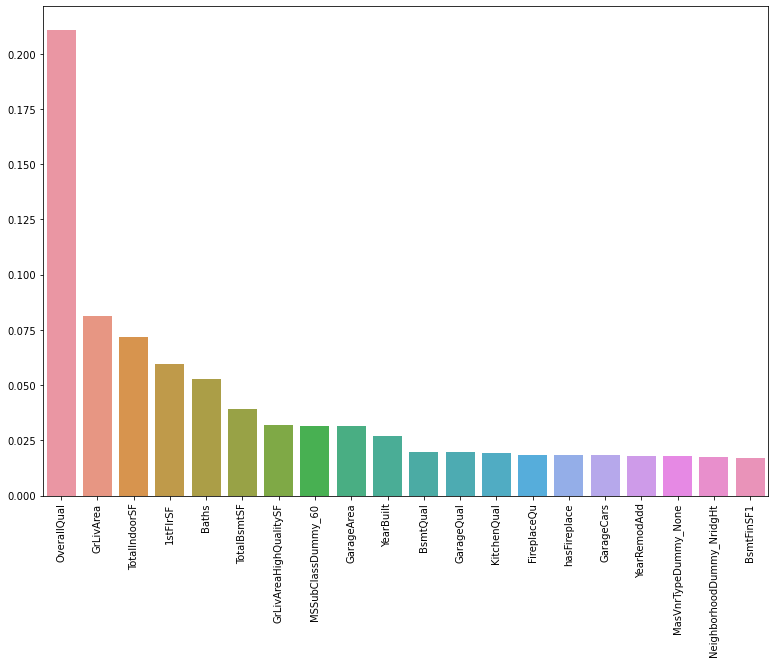

In [47]:
getFeatureImportance(20, X.columns.to_list(), gridGbr.best_estimator_.feature_importances_, sort='descending')

# Evaluating Errors

In [48]:
train_indices = split_indices[2][0]
test_indices = split_indices[2][1]
train_data = X.iloc[test_indices]
predictions = grid.predict(train_data)
actuals = y.iloc[test_indices]

NameError: name 'split_indices' is not defined

In [ ]:
split_results = pd.DataFrame(predictions, actuals).reset_index().rename(columns={'SalePrice':'Predictions',0:'Actuals'})
split_results['AbsDifference'] = abs(split_results['Predictions'] - split_results['Actuals'])
split_results['Difference'] = split_results['Predictions'] - split_results['Actuals']
split_results_sorted = split_results.sort_values(by='AbsDifference', ascending=False)
split_results_sorted

In [ ]:
train_data = train_data.reset_index()

In [ ]:
train_data_sorted = train_data.iloc[split_results_sorted.index]

In [ ]:
larger_errors = train_data_sorted.iloc[:int(len(train_data_sorted)/2)]
smaller_errors = train_data_sorted.iloc[int(len(train_data_sorted)/2):]

In [ ]:
larger_errors

In [ ]:
larger_errors.mean()[['TotalIndoorSF','OverallQual']]

In [ ]:
smaller_errors.mean()[['TotalIndoorSF','OverallQual']]

In [ ]:
split_results_sorted.iloc[:int(len(split_results_sorted)/2)]['Actuals'].mean()

In [ ]:
split_results_sorted.iloc[int(len(split_results_sorted)/2):]['Actuals'].mean()

In [ ]:
larger_errors.iloc[0,:60] - train_data_sorted.mean()[:60]

In [ ]:
split_results_sorted.head(50)

# Ridge Regression

In [49]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(trained.loc[:, trained.columns != 'SalePrice'])
X_Scaled = pd.DataFrame(X_Scaled, columns = trained.columns[trained.columns != 'SalePrice'])

In [50]:
model = Ridge()
params = {'alpha':[0.1,1,10,50,75,100,1000,2000]}
gridRidge = GridSearchCV(model, param_grid=params, cv=5)
gridRidge.fit(X_Scaled, y)
gridRidge.cv_results_

{'mean_fit_time': array([0.02652044, 0.00567327, 0.00559177, 0.00568576, 0.06057644,
        0.00674801, 0.00549355, 0.00564237]),
 'std_fit_time': array([0.04154204, 0.00013729, 0.00032819, 0.00013961, 0.10949473,
        0.00101415, 0.00017652, 0.00011631]),
 'mean_score_time': array([0.00280857, 0.002878  , 0.00282736, 0.00284467, 0.00337744,
        0.00332174, 0.00289478, 0.00293555]),
 'std_score_time': array([3.29607525e-04, 6.63147295e-05, 2.32705835e-04, 2.19823409e-04,
        6.04429629e-04, 6.60712810e-04, 5.99023252e-05, 3.87720513e-05]),
 'param_alpha': masked_array(data=[0.1, 1, 10, 50, 75, 100, 1000, 2000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 50},
  {'alpha': 75},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 2000}],
 'split0_test_score': array([0.9081048 , 0.91040947, 0.91181781, 0.90973829, 0.90976288,

In [51]:
gridRidge.best_params_

{'alpha': 100}

In [52]:
gridRidge.best_score_

0.8788481479666128

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('BldgTypeDummy_2fmCon', 7.272338731212358e-09),
 ('SaleConditionDummy_Partial', 1.1299278424026227e-07),
 ('NeighborhoodDummy_Timber', 1.6945064351681083e-07),
 ('NeighborhoodDummy_OldTown', 3.5591668883228067e-06),
 ('ElectricalDummy_FuseF', 5.521389293994261e-06),
 ('NeighborhoodDummy_Edwards', 5.549740657517788e-05),
 ('OpenPorchSF', 0.0002008029053743865),
 ('GarageArea', 0.00024491299972773106),
 ('Exterior1stDummy_AsphShn', 0.0002823458084142416),
 ('NeighborhoodDummy_NridgHt', 0.0007541156696764251),
 ('Condition1Dummy_PosA', 0.0008961162617815432),
 ('HeatingDummy_Wall', 0.000932959364098318),
 ('NeighborhoodDummy_Mitchel', 0.0012525374275371703),
 ('FunctionalDummy_Min1', 0.0012592047640707094),
 ('MSSubClassDummy_40', 0.0013849744155693955),
 ('NeighborhoodDummy_Gilbert', 0.0015939667549997871),
 ('Exterior1stDummy_CBlock', 0.003644914203913441),
 ('NeighborhoodDummy_MeadowV', 0.004239921946539882),
 ('PoolArea', 0.004309026565962881),
 ('AlleyDummy_No_Alley_Access', 0.0062

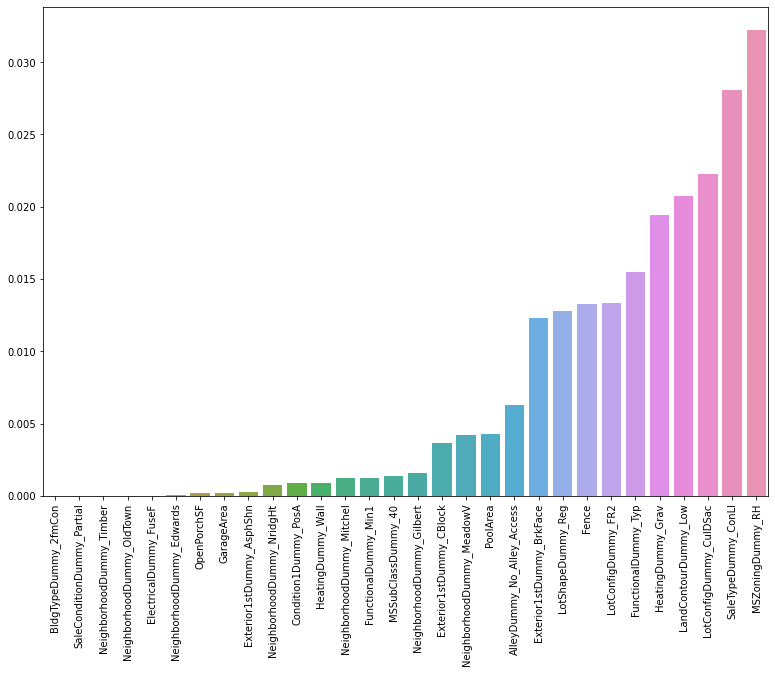

In [53]:
pvals = stats.coef_pval(gridRidge.best_estimator_, X_Scaled, y)
pvals_sorted = getFeatureImportance(30, X_Scaled.columns, pvals, sort='ascending')
pvals_sorted

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('OverallQual', 0.06025879777910892),
 ('1stFlrSF', 0.050113848098776725),
 ('OverallCond', 0.03713806624441162),
 ('LotArea', 0.030857820041004135),
 ('2ndFlrSF', 0.030470595558390615),
 ('YearBuilt', 0.027705904811401873),
 ('TotalBsmtSF', 0.027156405029849222),
 ('MSZoningDummy_RL', 0.026190645769544923),
 ('GarageCars', 0.026119899686079598),
 ('SaleConditionDummy_Normal', 0.024514775241044576),
 ('NeighborhoodDummy_NridgHt', 0.024134004986355567),
 ('PoolQC', -0.021707058483072264),
 ('GrLivArea', 0.020941310783984528),
 ('Condition2Dummy_PosN', -0.020162115046905984),
 ('MSZoningDummy_RM', 0.019672395520395014),
 ('NeighborhoodDummy_StoneBr', 0.01892520633791971),
 ('CentralAirDummy_Y', 0.018746609071278203),
 ('NeighborhoodDummy_Crawfor', 0.018519445294901484),
 ('BsmtFinSF1', 0.01822865883347843),
 ('YearRemodAdd', 0.01814065669388396),
 ('Condition1Dummy_Norm', 0.018001971961938215),
 ('MSZoningDummy_FV', 0.01757357690376556),
 ('NeighborhoodDummy_Edwards', -0.017502584061334

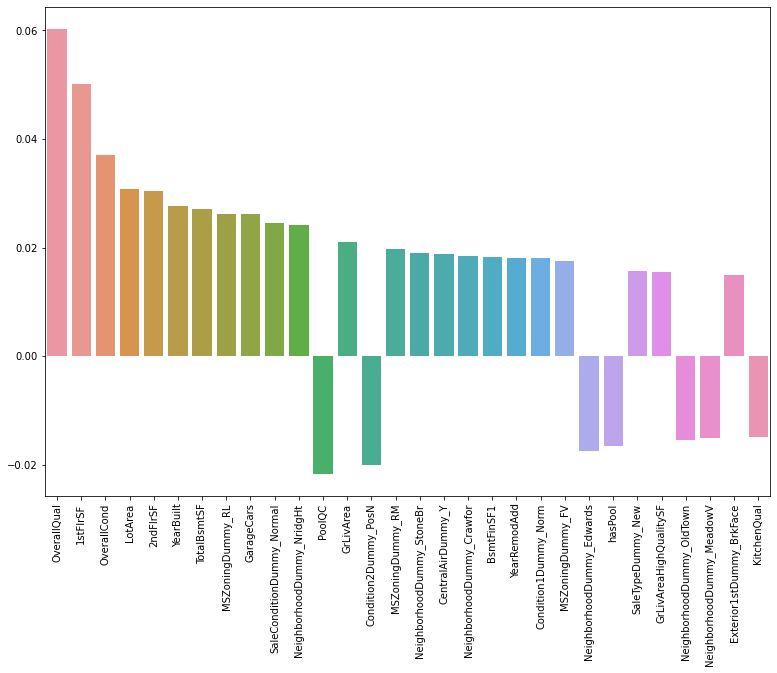

In [54]:
coefMagSorted = getFeatureImportance(30, X_Scaled.columns, gridRidge.best_estimator_.coef_, sort='descending')
coefMagSorted

In [55]:
#col_subset = [val[0] for val in pvals_sorted if val[1] < 0.05]
col_subset = [val[0] for val in coefMagSorted[:51]]
gridRidge = GridSearchCV(model, param_grid=params, cv=5)
gridRidge.fit(X_Scaled[col_subset], y)
gridRidge.cv_results_

{'mean_fit_time': array([0.00401573, 0.00376706, 0.00282798, 0.00222583, 0.00220051,
        0.0022676 , 0.00222125, 0.00229216]),
 'std_fit_time': array([6.01837397e-04, 5.50933439e-04, 2.53119096e-04, 7.26701081e-05,
        4.38642499e-05, 6.56573773e-05, 2.92863430e-05, 4.83527926e-05]),
 'mean_score_time': array([0.00233641, 0.00218554, 0.00173602, 0.00141726, 0.00138316,
        0.00145788, 0.00144243, 0.00145922]),
 'std_score_time': array([3.74986894e-04, 3.36793916e-04, 2.19916274e-04, 2.64945589e-05,
        9.79967069e-06, 8.61410517e-05, 3.41623126e-05, 3.00076469e-05]),
 'param_alpha': masked_array(data=[0.1, 1, 10, 50, 75, 100, 1000, 2000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 50},
  {'alpha': 75},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 2000}],
 'split0_test_score': array([0.92869899, 0.92896125, 0.9

In [56]:
gridRidge.best_params_

{'alpha': 100}

In [57]:
gridRidge.best_score_

0.8956802323580204

In [58]:
stats.summary(gridRidge.best_estimator_, X_Scaled[col_subset], y)

Residuals:
    Min      1Q  Median      3Q     Max
-0.5805 -0.0595 -0.0004  0.0531  1.3365


Coefficients:
             Estimate              Std. Error                t value   p value
_intercept  12.024057      0.003062+0.000000j  3927.373400+0.000000j  0.000000
x1           0.071908      0.005682+0.000000j    12.654800-0.000000j  0.000000
x2           0.053490      0.010688+0.000000j     5.004500-0.000000j  0.000001
x3           0.039406      0.003834-0.000000j    10.277200+0.000000j  0.000000
x4           0.043943      0.004117-0.000000j    10.673900+0.000000j  0.000000
x5           0.036732      0.013190+0.000000j     2.784800-0.000000j  0.005426
x6           0.028571      0.006974-0.000000j     4.096600+0.000000j  0.000044
x7           0.030236      0.004962-0.000000j     6.092800+0.000000j  0.000000
x8           0.018445      0.008819+0.000000j     2.091600+0.000000j  0.036644
x9           0.027868      0.006510-0.000000j     4.281100+0.000000j  0.000020
x10          0.019962   

# Lasso Regression

In [59]:
model = Lasso()
params = {'alpha':[0.005,0.006,0.0007,0.0008,0.001,0.01,0.1,1,10]}
gridLasso = GridSearchCV(model, param_grid=params, cv=5)
gridLasso.fit(X_Scaled, y)
gridLasso.cv_results_

{'mean_fit_time': array([0.01822233, 0.01531048, 0.03901577, 0.04007859, 0.03974733,
        0.01642532, 0.00576997, 0.00480714, 0.0047595 ]),
 'std_fit_time': array([0.00178514, 0.00194255, 0.00556611, 0.00529728, 0.00375846,
        0.0033216 , 0.00046915, 0.00025943, 0.00053348]),
 'mean_score_time': array([0.00378461, 0.00272403, 0.00291739, 0.00294442, 0.00309253,
        0.00273781, 0.00272961, 0.00277295, 0.00276556]),
 'std_score_time': array([4.29959055e-04, 3.67136298e-04, 8.11731198e-05, 2.58769926e-04,
        1.35256102e-04, 1.32028744e-04, 3.17616374e-04, 3.26433873e-04,
        3.78618510e-04]),
 'param_alpha': masked_array(data=[0.005, 0.006, 0.0007, 0.0008, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.005},
  {'alpha': 0.006},
  {'alpha': 0.0007},
  {'alpha': 0.0008},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'

In [60]:
gridLasso.best_params_

{'alpha': 0.0007}

In [61]:
gridLasso.best_score_

0.8844238024854066

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('MSZoningDummy_RL', 3.692823824508196e-12),
 ('MSZoningDummy_RH', 5.860867346996201e-12),
 ('MSZoningDummy_RM', 1.4809709014684813e-11),
 ('BldgTypeDummy_2fmCon', 4.0520475863559113e-11),
 ('StreetDummy_Pave', 9.261041267194514e-09),
 ('SaleConditionDummy_Partial', 7.973106663783369e-08),
 ('NeighborhoodDummy_OldTown', 2.0514409104777087e-07),
 ('NeighborhoodDummy_Timber', 2.0585224658198342e-07),
 ('GarageArea', 3.822547242959828e-06),
 ('NeighborhoodDummy_Edwards', 1.0216464446433093e-05),
 ('Condition1Dummy_PosA', 0.00014519865010642619),
 ('ElectricalDummy_FuseF', 0.00019376411966764984),
 ('Exterior1stDummy_AsphShn', 0.00031128096745436373),
 ('OpenPorchSF', 0.00044657493406763393),
 ('FunctionalDummy_Min1', 0.000719582640451133),
 ('NeighborhoodDummy_NridgHt', 0.001308679648466704),
 ('MSSubClassDummy_40', 0.0016695296201449938),
 ('Fence', 0.0032128346853019796),
 ('Exterior1stDummy_CBlock', 0.0033287576430809374),
 ('SaleTypeDummy_ConLI', 0.0033724385082556374),
 ('HeatingDum

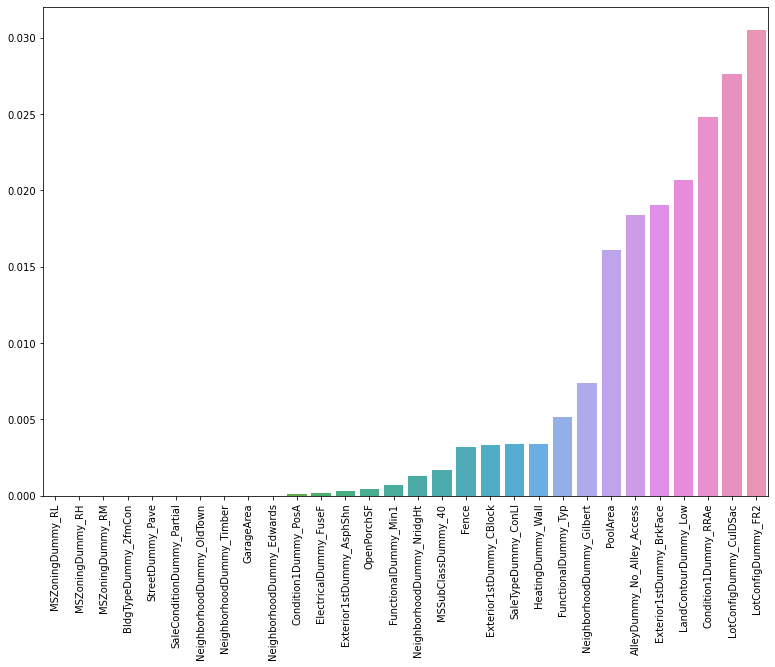

In [62]:
pvals = stats.coef_pval(gridLasso.best_estimator_, X_Scaled, y)
pvals_sorted = getFeatureImportance(30, X_Scaled.columns, pvals, sort='ascending')
pvals_sorted

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('LotFrontage', 0.07190757195010737),
 ('LotArea', 0.05348994475232774),
 ('OverallQual', 0.04394331696437963),
 ('LandSlope', 0.03940592222082168),
 ('OverallCond', 0.036732183541208226),
 ('TotalBsmtSF', 0.03564751894888011),
 ('YearRemodAdd', 0.030235646973769858),
 ('YearBuilt', 0.02857066859312085),
 ('ExterQual', 0.027867907231859838),
 ('BsmtFullBath', 0.02605471913418094),
 ('GrLivArea', -0.023949690820146908),
 ('BsmtExposure', 0.023820056561748605),
 ('BsmtQual', 0.021610292385168324),
 ('GarageArea', 0.02156866910238766),
 ('BsmtFinType1', -0.0209094683600549),
 ('KitchenAbvGr', -0.02015656911634572),
 ('ExterCond', 0.01996188345984042),
 ('BsmtUnfSF', 0.01941477456397117),
 ('BsmtCond', -0.019187259005784253),
 ('HeatingQC', 0.018763807465873666),
 ('BsmtFinType2', 0.018501381359198682),
 ('KitchenQual', -0.018478074183679746),
 ('MasVnrArea', 0.018445375286346037),
 ('1stFlrSF', 0.01733408586004743),
 ('BsmtFinSF2', 0.01698975390981612),
 ('GarageFinish', -0.0169495020958

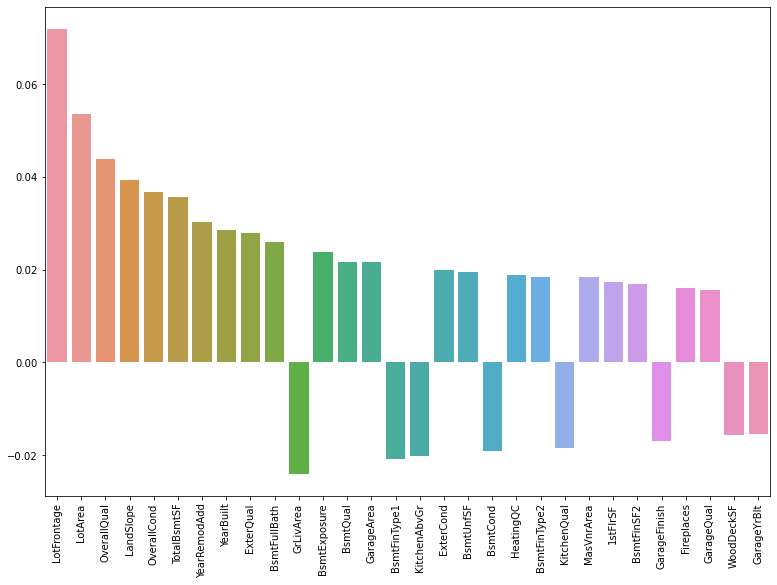

In [63]:
coefMagSorted = getFeatureImportance(30, X_Scaled.columns, gridRidge.best_estimator_.coef_, sort='descending')
coefMagSorted

In [64]:
stats.summary(gridLasso.best_estimator_, X_Scaled, y)

Residuals:
    Min      1Q  Median      3Q     Max
-0.5145 -0.0546  0.0001  0.0468  0.9373


Coefficients:
             Estimate                  Std. Error             t value   p value
_intercept  12.024057  5.057891e+04-3.970535e+01j  0.000200+0.000000j  0.999810
x1           0.001040  3.388121e+04-1.403017e+04j  0.000000+0.000000j  1.000000
x2           0.039442 -5.601917e+04+5.213417e+05j -0.000000-0.000000j  1.000000
x3           0.003602  3.868726e+04+3.120444e+04j  0.000000-0.000000j  1.000000
x4           0.069695 -9.368950e+03+4.527554e+04j -0.000000-0.000000j  0.999999
x5           0.041415  5.518890e+03-1.443349e+03j  0.000000+0.000000j  0.999994
x6           0.044689  2.233504e+02+1.402337e+03j  0.000000-0.000000j  0.999975
x7           0.014328  2.578983e+04+5.058688e+03j  0.000000-0.000000j  1.000000
x8           0.000000  3.289574e+04+8.278275e+03j  0.000000+0.000000j  1.000000
x9          -0.004557  8.200445e+03-1.872135e+03j -0.000000-0.000000j  1.000000
x10          

# SVR

In [65]:
model = SVR()
params = {'kernel':['linear'],'C':[0.1,1]}
gridSVR = GridSearchCV(model, param_grid=params, cv=5)
gridSVR.fit(X_Scaled, y)
gridSVR.cv_results_

{'mean_fit_time': array([ 1.16523204, 11.65412159]),
 'std_fit_time': array([0.1400766 , 1.17930233]),
 'mean_score_time': array([0.021946  , 0.02431145]),
 'std_score_time': array([0.00037349, 0.00432068]),
 'param_C': masked_array(data=[0.1, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'linear'}],
 'split0_test_score': array([0.90383921, 0.90485951]),
 'split1_test_score': array([0.87725686, 0.87387681]),
 'split2_test_score': array([0.86342096, 0.86410558]),
 'split3_test_score': array([0.90678458, 0.90346478]),
 'split4_test_score': array([0.8136927 , 0.81275001]),
 'mean_test_score': array([0.87299886, 0.87181134]),
 'std_test_score': array([0.03382215, 0.03360359]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [66]:
gridSVR.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [67]:
gridSVR.best_score_

0.8729988625997631

# Kernal Ridge

# Predictions on Test Set

In [161]:
tested_scaled = scaler.fit_transform(tested)
tested_scaled = pd.DataFrame(tested_scaled, columns = tested.columns)

In [162]:
gbr_predictions = gridGbr.predict(tested)
ridge_predictions = gridRidge.predict(tested_scaled[col_subset])
lasso_predictions = gridLasso.predict(tested_scaled)
svr_predictions = gridSVR.predict(tested_scaled)

In [163]:
gbr_predictions = pd.Series(np.exp(np.array(gbr_predictions)))
ridge_predictions = pd.Series(np.exp(np.array(ridge_predictions)))
lasso_predictions = pd.Series(np.exp(np.array(lasso_predictions)))
svr_predictions = pd.Series(np.exp(np.array(svr_predictions)))

In [164]:
results = pd.concat([tested.reset_index()['Id'], pd.concat([gbr_predictions, ridge_predictions, lasso_predictions, svr_predictions], axis=1)],axis=1)

In [165]:
final_pred = np.exp((np.log(results[0]) + np.log(results[1]) + np.log(results[2]) + np.log(results[3]))/4)
final_pred = pd.DataFrame(final_pred, columns=['SalePrice'])

In [166]:
results = pd.concat([results, final_pred],axis=1)

In [169]:
#results[['Id','SalePrice']].to_csv('submission4.csv', index=False)